# Topic Modelling

It is different from rule-based text mining approaches that use regular expressions or dictionary based keyword searching techniques. It is an unsupervised approach used for finding and observing the bunch of words in large clusters of texts.

Topic Models are very useful for the purpose for document clustering, organizing large blocks of textual data, information retrieval from unstructured text and feature selection.

#### Tasks to perform 
- Preparing documents
- Cleaning and Preprocessing
- Preparing document term matrix
- Running LDA(Latent Dirichlet Allocation) model
- Improve results


## Preparing documents

Passage is taken from https://www.learncbse.in/unseen-passage-for-class-7/

In [1]:
doc1="Our ancestors had great difficulty in getting books. Now, our difficulty is what to read. There are books and books but our hours of reading are very few."
doc2="Therefore, choice becomes essential. We should be very careful about what we read. There are books which poison our lives by suggesting evils. We should keep them at arm’s length."
doc3="We should read only those books which have stood the test of time. Such books are our great classics like the Ramayana and the Gita. "
doc4="They contain the wisdom of our sages and saints. They have appealed mankind from generation to generation."
doc5="Reading of such books has ennobling influence on our mind and character. It gives us spiritual enjoyment. These books give us instruction with entertainment."
doc6="They represent our ancient culture. They set before us high ideals to follow. They are our best friends, best guides and the best treasure."

In [2]:
docs=[doc1,doc2, doc3, doc4, doc5, doc6]

## Cleaning and Preprocessing

removing punctuations, stopwords, normalizing corpus

In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import wordnet

In [31]:
import re
import os

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
stopwords_list=stopwords.words('english')
stopwords_list[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
lemm = WordNetLemmatizer()
stemm = PorterStemmer()
stemm_l = LancasterStemmer()
stemm_s = SnowballStemmer('english')

In [8]:
def porter_clean(doc):
    doc=doc.split()
    rem_stops = ' '.join(word for word in doc if word.lower() not in stopwords_list)
    rem_punc = (re.sub('\W+', ' ', rem_stops))
    #print(rem_punc)
    get_stem = ' '.join([stemm.stem(word) for word in rem_punc.split()])
    get_lem=' '.join([lemm.lemmatize(word) for word in get_stem.split() if len(word)>=3])
    #print(get_lem)
    return get_lem

In [9]:
clean_doc = [porter_clean(doc) for doc in docs]

In [10]:
clean_doc

['ancestor great difficulti get book now difficulti read book book hour read few',
 'therefor choic becom essenti care read book poison live suggest evil keep arm length',
 'read book stood test time book great classic like ramayana gita',
 'contain wisdom sage saint appeal mankind gener gener',
 'read book ennobl influenc mind charact give spiritu enjoy book give instruct entertain',
 'repres ancient cultur set high ideal follow best friend best guid best treasur']

In [11]:
def lancaster_clean(doc):
    doc=doc.split()
    rem_stops = ' '.join(word for word in doc if word.lower() not in stopwords_list)
    rem_punc = (re.sub('\W+', ' ', rem_stops))
    #print(rem_punc)
    get_stem = ' '.join([stemm_l.stem(word) for word in rem_punc.split()])
    get_lem=' '.join([lemm.lemmatize(word) for word in get_stem.split() if len(word)>=3])
    #print(get_lem)
    return get_lem

In [12]:
clean_doc = [lancaster_clean(doc) for doc in docs]
clean_doc

['ancest gre difficul get book now difficul read book book hour read few',
 'theref cho becom es car read book poison liv suggest evil keep arm leng',
 'read book stood test tim book gre class lik ramayan git',
 'contain wisdom sag saint mankind gen gen',
 'read book ennobl influ mind charact giv spirit enjoy book giv instruct entertain',
 'repres ant cult set high follow best friend best guid best treas']

In [13]:
def clean(doc):
    doc=doc.split()
    rem_stops = ' '.join(word for word in doc if word.lower() not in stopwords_list)
    rem_punc = (re.sub('\W+', ' ', rem_stops))
    #print(rem_punc)
    get_lem=' '.join([lemm.lemmatize(word) for word in rem_punc.split()])
    #get_stem = ' '.join([stemm_s.stem(word) for word in get_lem.split() if len(word)>=3])
    
    #print(get_lem)
    return get_lem

In [14]:
clean_doc = [clean(doc) for doc in docs]
clean_doc

['ancestor great difficulty getting book Now difficulty read book book hour reading few',
 'Therefore choice becomes essential careful read book poison life suggesting evil keep arm s length',
 'read book stood test time book great classic like Ramayana Gita',
 'contain wisdom sage saint appealed mankind generation generation',
 'Reading book ennobling influence mind character give u spiritual enjoyment book give u instruction entertainment',
 'represent ancient culture set u high ideal follow best friend best guide best treasure']

## Preparing Document-Term Matrix

To run any mathematical model on text corpus, it is a good practice to convert it into a matrix representation. LDA model looks for repeating term patterns in the entire DT matrix. Python provides many great libraries for text mining practices, “gensim” is one of the clean library to handle text data. It is scalable, robust and efficient.

In [15]:
import gensim
from gensim import corpora, models

In [16]:
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import common_texts

Steps to follow-
- Create list of list of words in the respective documents
- Create dictionary from this list of lists using gensim.corpora.dictionary.Dictionary
- for each doc(converted to list) run function doc to bag of words. This function is called from the Dictionary created



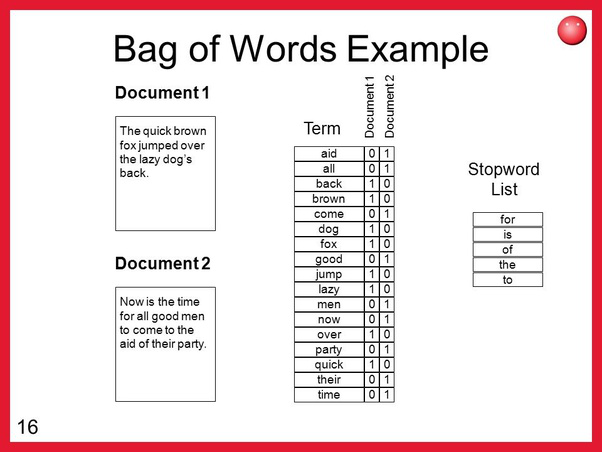

In [17]:
from PIL import Image
Image.open("bow.jpg")

In [18]:
clean_doc_list = [doc.split() for doc in clean_doc]
print(clean_doc_list[0])
doc_dict = Dictionary(clean_doc_list)
doc_2bow = [doc_dict.doc2bow(doc) for doc in clean_doc_list]

['ancestor', 'great', 'difficulty', 'getting', 'book', 'Now', 'difficulty', 'read', 'book', 'book', 'hour', 'reading', 'few']


In [19]:
doc_2bow[0][:5]

[(0, 1), (1, 1), (2, 3), (3, 2), (4, 1)]

## Running LDA

In [20]:
lda = gensim.models.ldamodel.LdaModel(corpus=doc_2bow, num_topics=3, id2word=doc_dict, passes=50)

In [21]:
lda.alpha

array([0.33333334, 0.33333334, 0.33333334], dtype=float32)

In [22]:
lda.get_topics().shape

(3, 59)

In [23]:
lda.print_topics(num_topics=5, num_words=3)

[(0, '0.055*"u" + 0.055*"give" + 0.055*"generation"'),
 (1, '0.123*"book" + 0.054*"read" + 0.053*"difficulty"'),
 (2, '0.069*"best" + 0.027*"high" + 0.027*"represent"')]

## Improving Topic modeling

In [24]:
new_doc_2bow=[]

for bow in doc_2bow:
    l=[]
    for x,y in bow:
        if y>1:
            #print((x,y))
            l.append((x,y))
    new_doc_2bow.append(l)

In [25]:
new_doc_2bow

[[(2, 3), (3, 2)],
 [],
 [(2, 2)],
 [(32, 2)],
 [(2, 2), (42, 2), (47, 2)],
 [(49, 3)]]

In [26]:
lda = gensim.models.ldamodel.LdaModel(corpus=new_doc_2bow, num_topics=3, id2word=doc_dict, passes=50)

In [27]:
lda.print_topics(num_topics=5, num_words=3)

[(0, '0.017*"generation" + 0.017*"book" + 0.017*"best"'),
 (1, '0.147*"best" + 0.015*"generation" + 0.015*"book"'),
 (2, '0.212*"book" + 0.067*"u" + 0.067*"give"')]

#### Above topic modelling output is not satisfactory

Time to add full passages and try to make our model do the guess work on Topic of passage.

We will check if our model will pass english unseen passage exam and answer the questions students have to answer.

In [28]:
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))
display_gif('tenor.gif')

In [32]:
file = open(os.path.join("text_files","passage1.txt"),'r', encoding="utf8")
passage1 = file.read()
file.close()

In [33]:
file = open(os.path.join("text_files","passage2.txt"),'r', encoding="utf8")
passage2 = file.read()
file.close()

In [34]:
file = open(os.path.join("text_files","passage3.txt"),'r', encoding="utf8")
passage3 = file.read()
file.close()

In [35]:
file = open(os.path.join("text_files","passage4.txt"),'r', encoding="utf8")
passage4 = file.read()
file.close()

In [36]:
file = open(os.path.join("text_files","passage5.txt"),'r', encoding="utf8")
passage5 = file.read()
file.close()

In [37]:
file = open(os.path.join("text_files","passage6.txt"),'r', encoding="utf8")
passage6 = file.read()
file.close()

In [38]:
passages=[passage1, passage2, passage3, passage4, passage5, passage6]

#### Our steps will include 
    Cleaning and Preprocessing,
    Preparing Document-Term Matrix
    Running LDA
    Improving Model
    

In [39]:
stopwords_list = stopwords.words('english')
stopwords_list[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
#punctuation, stopword & lemma
clean_passg=list()
# lemma
wlemm=WordNetLemmatizer()


In [41]:
def tune_data(passage):
    rem_spl = re.sub('\W+', ' ', passage)
    no_stops=([word.lower() for word in rem_spl.split() if word.lower() not in stopwords_list])
    clean_passg=[wlemm.lemmatize(word) for word in no_stops if len(word.strip()) >= 4]
    return clean_passg

In [42]:
clean_passg = [tune_data(p) for p in passages]
len(clean_passg)
#print(clean_passg)

6

In [43]:
#for w in clean_passg:
#    for y in w:
#        if len(y)<4:
#            print(len(y), y)

In [44]:
dict_passg = Dictionary(clean_passg)

In [45]:
bow_passg = [dict_passg.doc2bow(word) for word in clean_passg]

In [46]:
#print(bow_passg)

In [47]:
lda_passg_bow=gensim.models.LdaMulticore(bow_passg, id2word=dict_passg, num_topics=5, passes=10 )

In [48]:
lda_passg_bow.alpha

array([0.2, 0.2, 0.2, 0.2, 0.2], dtype=float32)

In [49]:
lda_passg_bow.get_topics()

array([[0.00044686, 0.00044661, 0.00045473, ..., 0.00045108, 0.00044831,
        0.00044899],
       [0.00112801, 0.00112808, 0.0011366 , ..., 0.00113234, 0.00112971,
        0.00112898],
       [0.00193028, 0.00193018, 0.00353852, ..., 0.00032243, 0.00032243,
        0.00032243],
       [0.00022935, 0.00022948, 0.00023057, ..., 0.00022961, 0.00022933,
        0.00022931],
       [0.00059275, 0.00059291, 0.00647676, ..., 0.00647152, 0.00352975,
        0.00352928]], dtype=float32)

In [50]:
lda_passg_bow.print_topics(num_words=5, num_topics=5)

[(0,
  '0.032*"book" + 0.014*"adult" + 0.012*"colouring" + 0.009*"drawing" + 0.009*"mind"'),
 (1,
  '0.001*"health" + 0.001*"people" + 0.001*"care" + 0.001*"tobacco" + 0.001*"medical"'),
 (2,
  '0.052*"care" + 0.026*"home" + 0.026*"health" + 0.020*"patient" + 0.020*"service"'),
 (3,
  '0.014*"people" + 0.013*"medical" + 0.013*"india" + 0.013*"disease" + 0.011*"tobacco"'),
 (4,
  '0.018*"laughter" + 0.012*"laugh" + 0.012*"good" + 0.009*"laughing" + 0.006*"system"')]

## Running LDA using TF-IDF

In [51]:
tfidf = models.TfidfModel(bow_passg)

In [52]:
corpus_tfidf = tfidf[bow_passg]

In [53]:
from pprint import pprint

In [54]:
# prints %age of word in document
#for doc in corpus_tfidf:
#    pprint(doc)
#    break

In [55]:
lda_passg_tfidf = models.LdaMulticore(corpus_tfidf, id2word=dict_passg, num_topics=5, passes=10 )

In [56]:
lda_passg_tfidf.print_topics(num_topics=5, num_words=5)

[(0,
  '0.004*"book" + 0.004*"care" + 0.003*"aid" + 0.002*"disease" + 0.002*"colouring"'),
 (1,
  '0.003*"smoking" + 0.003*"tobacco" + 0.002*"smoker" + 0.002*"say" + 0.002*"quit"'),
 (2,
  '0.003*"laughter" + 0.003*"laugh" + 0.003*"good" + 0.002*"laughing" + 0.002*"whether"'),
 (3,
  '0.003*"company" + 0.002*"india" + 0.002*"medical" + 0.002*"detail" + 0.002*"provides"'),
 (4,
  '0.001*"company" + 0.001*"india" + 0.001*"medical" + 0.001*"tourism" + 0.001*"package"')]

In [57]:
for index, score in sorted(lda_passg_bow[bow_passg[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_passg_bow.print_topic(index, 10)))


Score: 0.9967119693756104	 
Topic: 0.014*"people" + 0.013*"medical" + 0.013*"india" + 0.013*"disease" + 0.011*"tobacco" + 0.009*"place" + 0.009*"aid" + 0.009*"million" + 0.008*"smoking" + 0.007*"health"


In [58]:
for index, score in sorted(lda_passg_tfidf[bow_passg[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_passg_tfidf.print_topic(index, 10)))


Score: 0.9966844916343689	 
Topic: 0.004*"book" + 0.004*"care" + 0.003*"aid" + 0.002*"disease" + 0.002*"colouring" + 0.002*"service" + 0.002*"infection" + 0.002*"future" + 0.002*"home" + 0.002*"customer"


## Testing model on unseen document

In [60]:
file = open(os.path.join("text_files","test.txt"),'r', encoding="utf8")
test = file.read()
file.close()

In [61]:
clean_test = tune_data(test)

In [62]:
clean_test[:10]

['health',
 'broadly',
 'divided',
 'type',
 'physical',
 'health',
 'mental',
 'health',
 'although',
 'dimension']

In [63]:
bow_test = dict_passg.doc2bow(document=clean_test)

In [64]:
for index, score in sorted(lda_passg_bow[bow_test], key=lambda tup: -1*tup[1]):
    #print(round(score, 3), index)
    print("Score: {}\t Topic: {}".format(score, lda_passg_bow.print_topic(index, 5)))

Score: 0.4530673325061798	 Topic: 0.052*"care" + 0.026*"home" + 0.026*"health" + 0.020*"patient" + 0.020*"service"
Score: 0.2727982699871063	 Topic: 0.014*"people" + 0.013*"medical" + 0.013*"india" + 0.013*"disease" + 0.011*"tobacco"
Score: 0.1775606870651245	 Topic: 0.032*"book" + 0.014*"adult" + 0.012*"colouring" + 0.009*"drawing" + 0.009*"mind"
Score: 0.09168991446495056	 Topic: 0.018*"laughter" + 0.012*"laugh" + 0.012*"good" + 0.009*"laughing" + 0.006*"system"


In [65]:
for index, score in sorted(lda_passg_tfidf[bow_test], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_passg_tfidf.print_topic(index, 5)))

Score: 0.9799636006355286	 Topic: 0.004*"book" + 0.004*"care" + 0.003*"aid" + 0.002*"disease" + 0.002*"colouring"


## Currently this model is not the most accurate bcoz it has not been trained with a big corpora.

Our aim further will be to improve it by feeding more training data. All of us students had read way too much than this model so of course we will be better than this model for now :)

# Let the web scraping begin!!!

In another notebook.